In [1]:
import numpy as np
import pandas as pd 

In [6]:
# Load the dataset with a specified encoding
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

## Stages Of Project 

### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Model Evaluation
### 6. Improvement
### 7. Website
### 8. Deployment


# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

## Rename the cols

In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['target']=encoder.fit_transform(df['target']) 

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check missing value 

In [18]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Check for duplicate values

In [19]:
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# 2.Exploratory data analysis (EDA)

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt

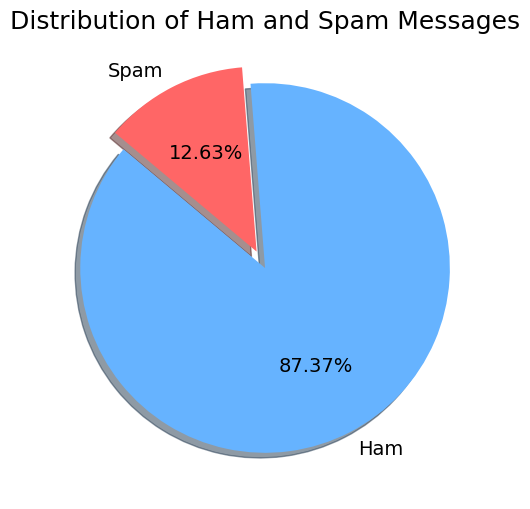

In [29]:
# Define colors
colors = ['#66b3ff','#ff6666']

# Create the pie chart with enhancements
plt.figure(figsize=(8, 6))  # Adjust the size of the pie chart
plt.pie(
    df['target'].value_counts(),
    labels=['Ham', 'Spam'],
    autopct="%0.2f%%",  # Display percentages with two decimal places and a percent sign
    colors=colors,  # Set custom colors
    startangle=140,  # Start the pie chart at a different angle
    explode=(0, 0.1),  # Slightly "explode" the spam section for emphasis
    shadow=True,  # Add a shadow effect for a 3D look
    textprops={'fontsize': 14}  # Increase the font size of the labels
)

# Add a title with custom font size
plt.title('Distribution of Ham and Spam Messages', fontsize=18)

# Show the plot
plt.show()

### Data is imbalanced 

In [44]:
# nlp lib
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAUSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import nltk

print(nltk.data.path)


['C:\\Users\\KAUSHAL/nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\KAUSHAL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [46]:
df['num_character']=df['text'].apply(len)

In [47]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### number of words

In [52]:
import nltk

# Explicitly download 'punkt' to the specified directory
nltk.download('punkt', download_dir='C:\\Users\\KAUSHAL\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\KAUSHAL\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
import os

# Check if the punkt folder exists in the specified nltk_data directory
print(os.listdir('C:\\Users\\KAUSHAL\\nltk_data\\tokenizers\\punkt'))


['.DS_Store', 'czech.pickle', 'danish.pickle', 'dutch.pickle', 'english.pickle', 'estonian.pickle', 'finnish.pickle', 'french.pickle', 'german.pickle', 'greek.pickle', 'italian.pickle', 'malayalam.pickle', 'norwegian.pickle', 'polish.pickle', 'portuguese.pickle', 'PY3', 'README', 'russian.pickle', 'slovene.pickle', 'spanish.pickle', 'swedish.pickle', 'turkish.pickle']


In [58]:
import nltk

nltk.download('punkt', download_dir='C:\\Users\\KAUSHAL\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\KAUSHAL\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\KAUSHAL\\nltk_data'
**********************************************************************
